In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale, StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#MODEL

In [3]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'], axis = 1).astype("float64")
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [4]:
X_train_low = pd.DataFrame(X_train["Hits"])
X_test_low = pd.DataFrame(X_test["Hits"]) 

In [5]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 10)

In [6]:
cart_model.fit(X_train_low,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

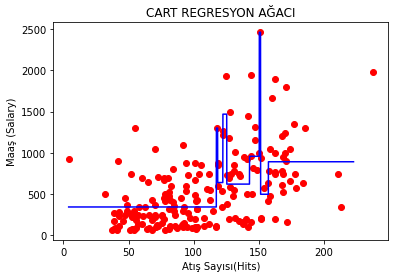

In [7]:
X_grid  = np.arange(min(np.array(X_train_low)),max(np.array(X_test_low)),0.01)
X_grid  = X_grid.reshape((len(X_grid),1))
plt.scatter(X_train_low, y_train, color = 'red')
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')
plt.title('CART REGRESYON AĞACI')
plt.xlabel('Atış Sayısı(Hits)')
plt.ylabel('Maaş (Salary)');

In [8]:
!pip install skompiler

In [9]:
from skompiler import skompile 

In [10]:
print(skompile(cart_model.predict).to('python/code'))

(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)



In [11]:
#TAHMİN

In [15]:
x = [91]

In [16]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)


345.2011551724138

In [19]:
cart_model.predict(X_test_low)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [20]:
#TUNNING

In [39]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

464.8235672827917

In [49]:
cart_params = {'min_samples_split':range(2,100), 'max_leaf_nodes':range(2,10)}

In [50]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [51]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [52]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 37}

In [63]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes= 9, min_samples_split = 37)
cart_tuned.fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

376.39788207109865